# Curso de Manejo de Datos Faltantes: Detección y Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=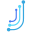)](https://jvelezmagic.com/)


## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

or 

```bash
pip install -r requirements.txt
```

In [2]:
%load_ext autoreload
%autoreload 2

## Importar librerías

In [1]:
# %pip install --upgrade pip
# %pip install -r ../requirements.txt

In [2]:
import missing_data.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

## Importar funciones personalizadas

In [5]:
%run ../missing_data/utils/pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [6]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

In [7]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    # None + True,
    type(None),
    sep='\n'
)

True
False
True
True
<class 'NoneType'>


### NumPy

In [8]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    type(np.nan),
    np.isnan(np.nan),
    sep='\n'
)

nan
False
True
<class 'float'>
True


### Pandas

In [9]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0,1, np.nan, np.nan, None],
        y=[0,1, pd.NA,  np.nan, None]
    )
)
test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [10]:
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [11]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [12]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [13]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [14]:
pd.Series([pd.to_datetime('2022-01-01'), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [15]:
pd.Series([-1]).isnull()

0    False
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [16]:
pima_indians_diabetes_url = 'https://nrvis.com/data/mldata/pima-indians-diabetes.csv'

In [17]:
!wget -O ../data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [18]:
diabetes_df = pd.read_csv (
    path.data_dir('pima-indians-diabetes.csv'), # or pima_indians_diabetes_url
    sep=',',
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

In [19]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [20]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [21]:
datasets_dfs = {}

for dataset_name in datasets_names:
    dataset_file = f'{ dataset_name }{ extension }'
    dataset_output_file = path.data_dir(dataset_file)
    dataset_url = f'{base_url}{dataset_file}'

    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### Incluir conjuntos de datos en nuestro ambiente local

In [22]:
locals().update(**datasets_dfs)
del datasets_dfs

### Verificar carga

In [23]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

## Tabulación de valores faltantes

In [24]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [25]:
print(
    riskfactors_df.size,
    riskfactors_df.shape,
    sep='\n'
    )

8330
(245, 34)


#### Número total de valores completos (sin observaciones faltantes)

In [26]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [27]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [28]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


##### Tabulación del resumen por variable

In [29]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [30]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


##### Tabulación del resumen por caso

In [31]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Intervalos de valores faltantes

In [32]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable='weight_lbs',
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

In [33]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable='weight_lbs',
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de valores faltantes

### Variable

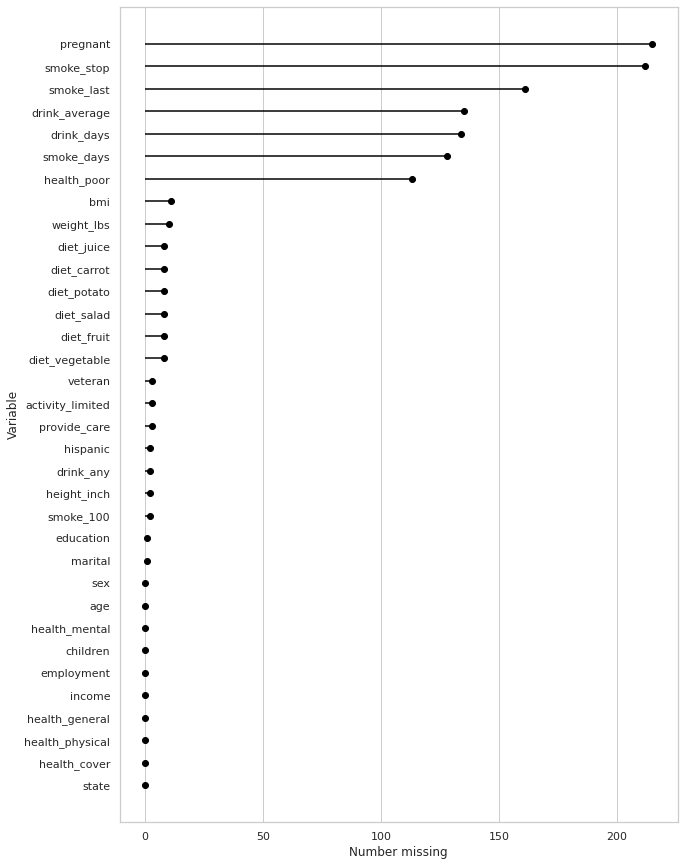

In [34]:
plt.figure(figsize=(10,15))
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

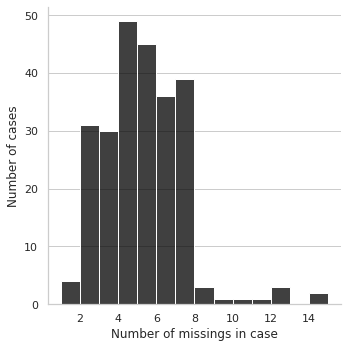

In [35]:
riskfactors_df.missing.missing_case_plot()

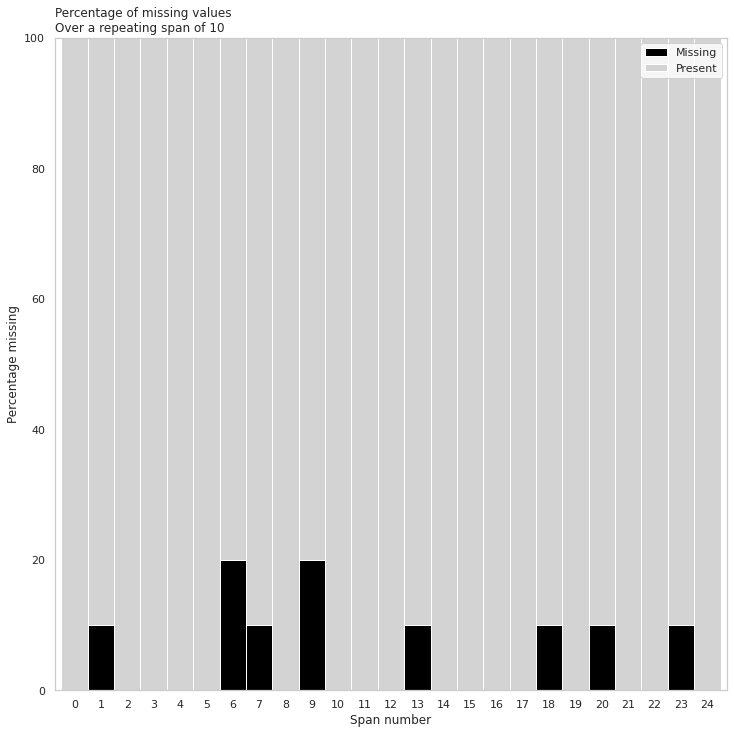

In [36]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs',
        span_every=10,
    )
)

<AxesSubplot:>

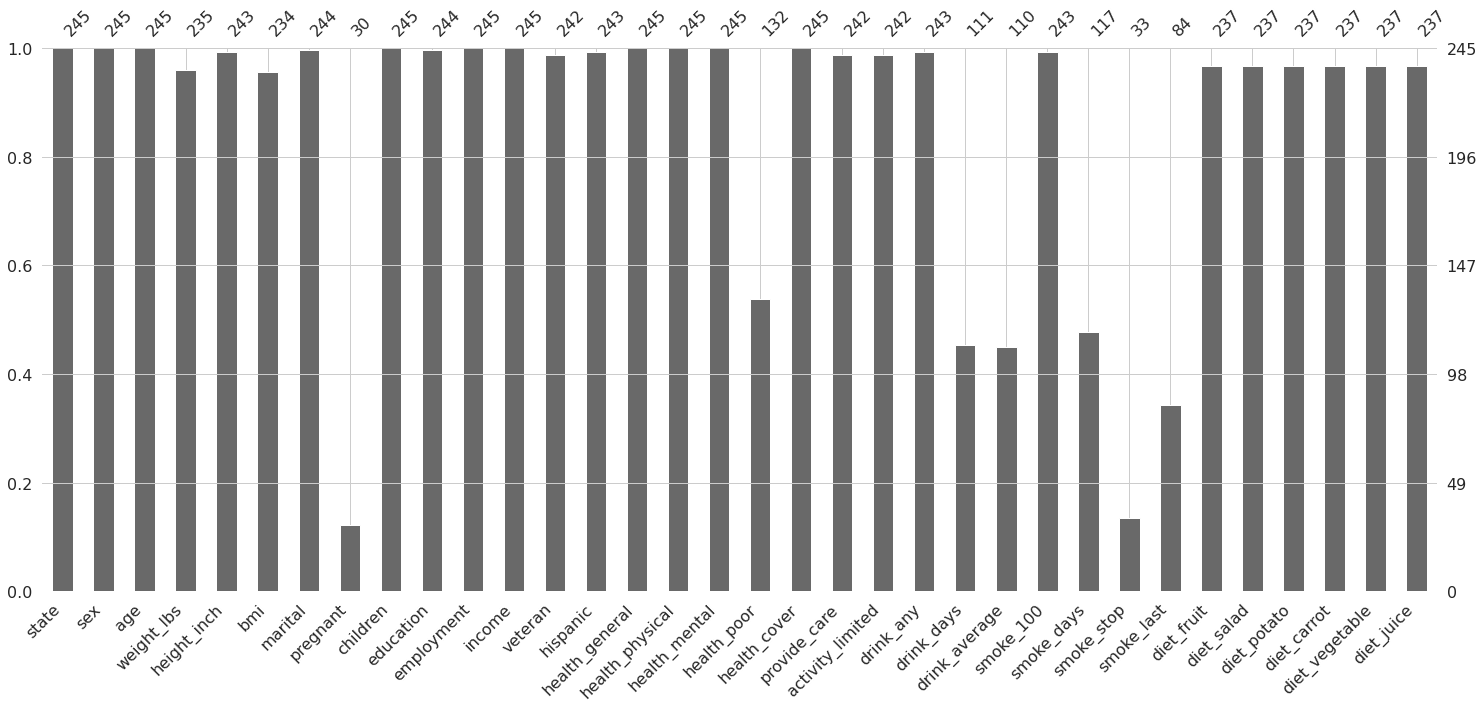

In [37]:
missingno.bar(
    df=riskfactors_df
)

<AxesSubplot:>

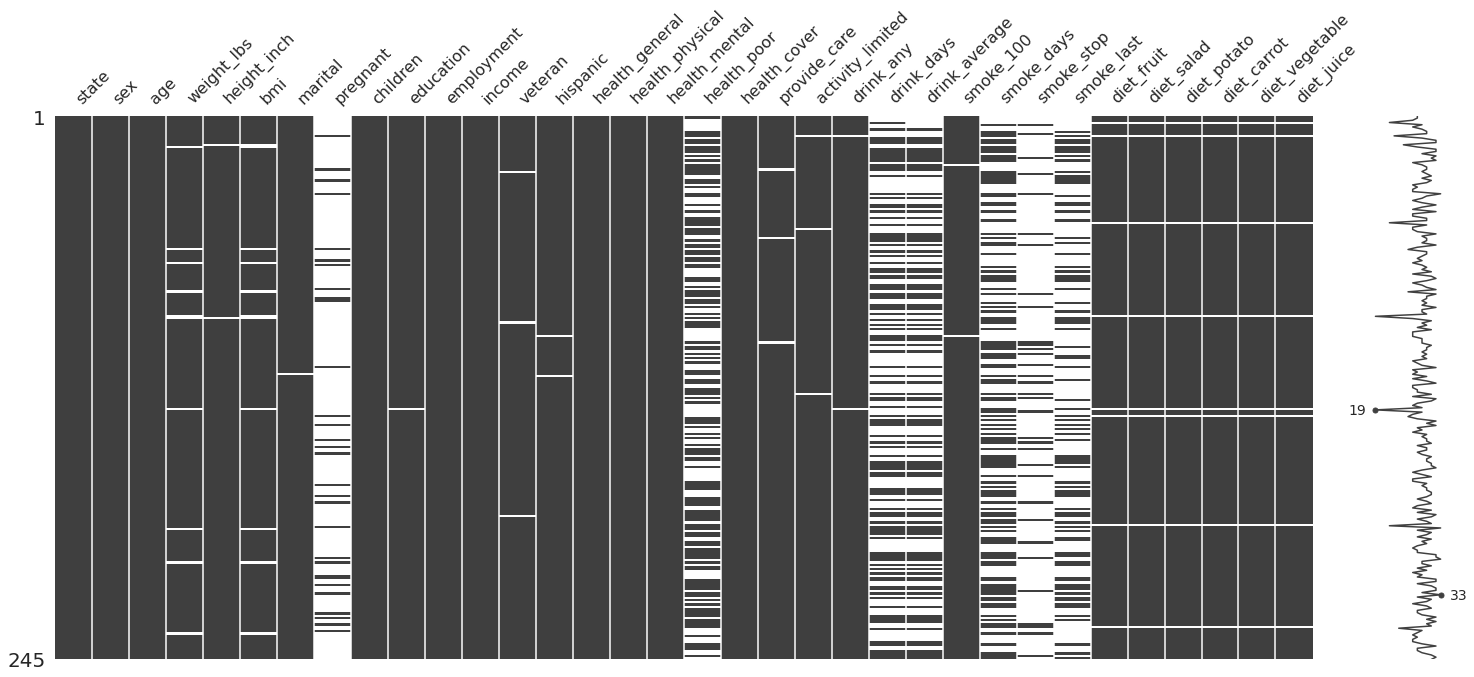

In [38]:
missingno.matrix(
    df=riskfactors_df
    )

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

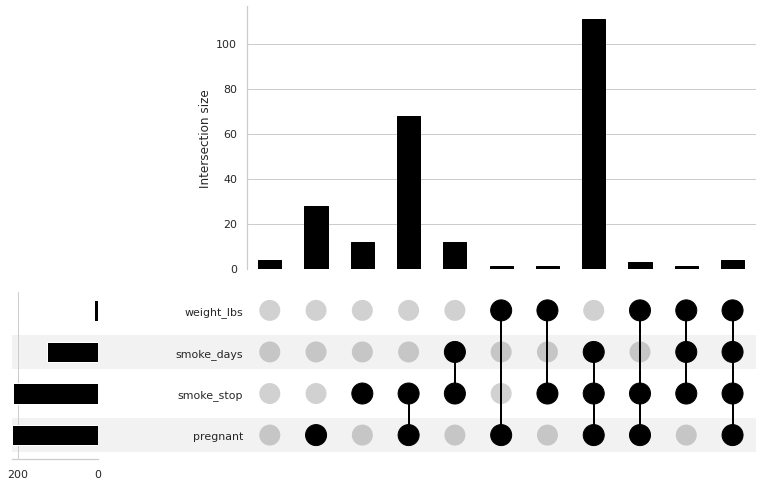

In [39]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=['pregnant', 'weight_lbs', 'smoke_stop', 'smoke_days'],
        element_size=60
    )
)

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [40]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [41]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [42]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [43]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [44]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [45]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [46]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [47]:
pd.read_csv(
    '../data/missing_data_enconding_example.csv',
    na_filter=True,
    na_values=[-99,-1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


#### Sustitución global

In [48]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99,'NA'],
        value= np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


#### Sustitución dirigida

In [49]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x": {
                -99: np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [50]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [51]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index='name',
        names_from='time',
        values_from='value'
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


#### Cuantificar ocurrencias de n-tuplas

In [52]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name']
    )
    .reset_index(name='n')
    .query('n < 3')
)

,name,n
1,zelda,1


### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [53]:
(
    implicit_to_explicit_df
    # janitor
    .complete(
        'name',
        'time'
    ) 
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar la exposición de n-tuplas de valores faltantes

In [54]:
(
    implicit_to_explicit_df
    .complete(
        {'name': ['lynn', 'zelda']},
        {'time' : ['morning','afternoon']},
        sort = True
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


#### Rellenar los valores faltantes

In [55]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value = '317931'
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,317931
3,zelda,morning,320.0
4,zelda,afternoon,317931
5,zelda,night,317931


#### Limitar el rellenado de valores faltantes implícitos

In [56]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value=0,
        explicit=False
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


## Tipos de valores faltantes

In [57]:
diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


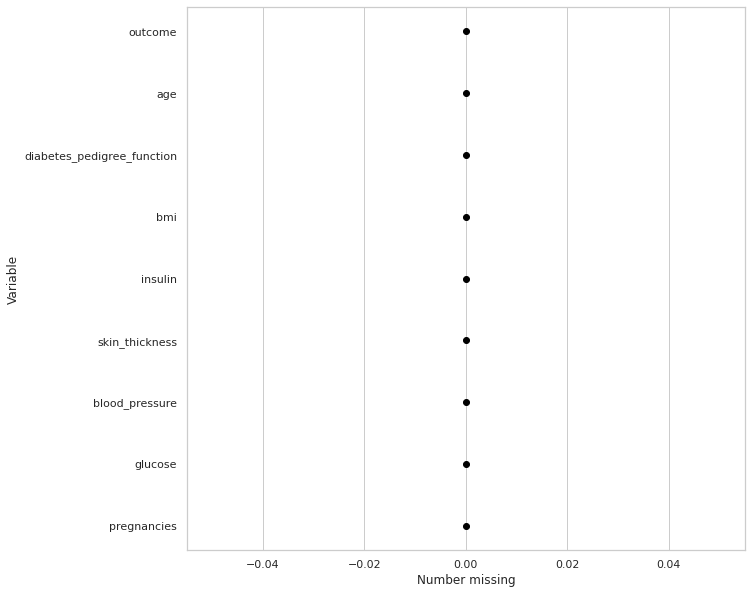

In [58]:
diabetes_df.missing.missing_variable_plot()

In [59]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)

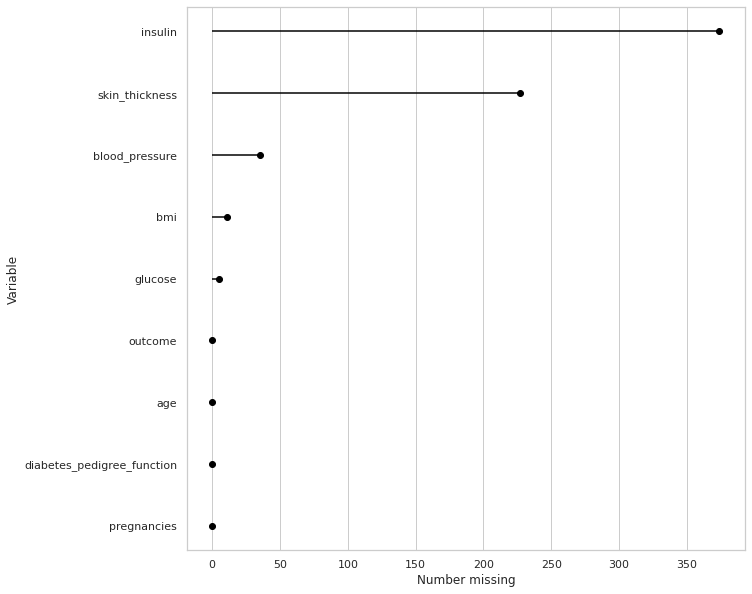

In [60]:
diabetes_df.missing.missing_variable_plot()

### _Missing Completely At Random_ (MCAR)

<AxesSubplot:>

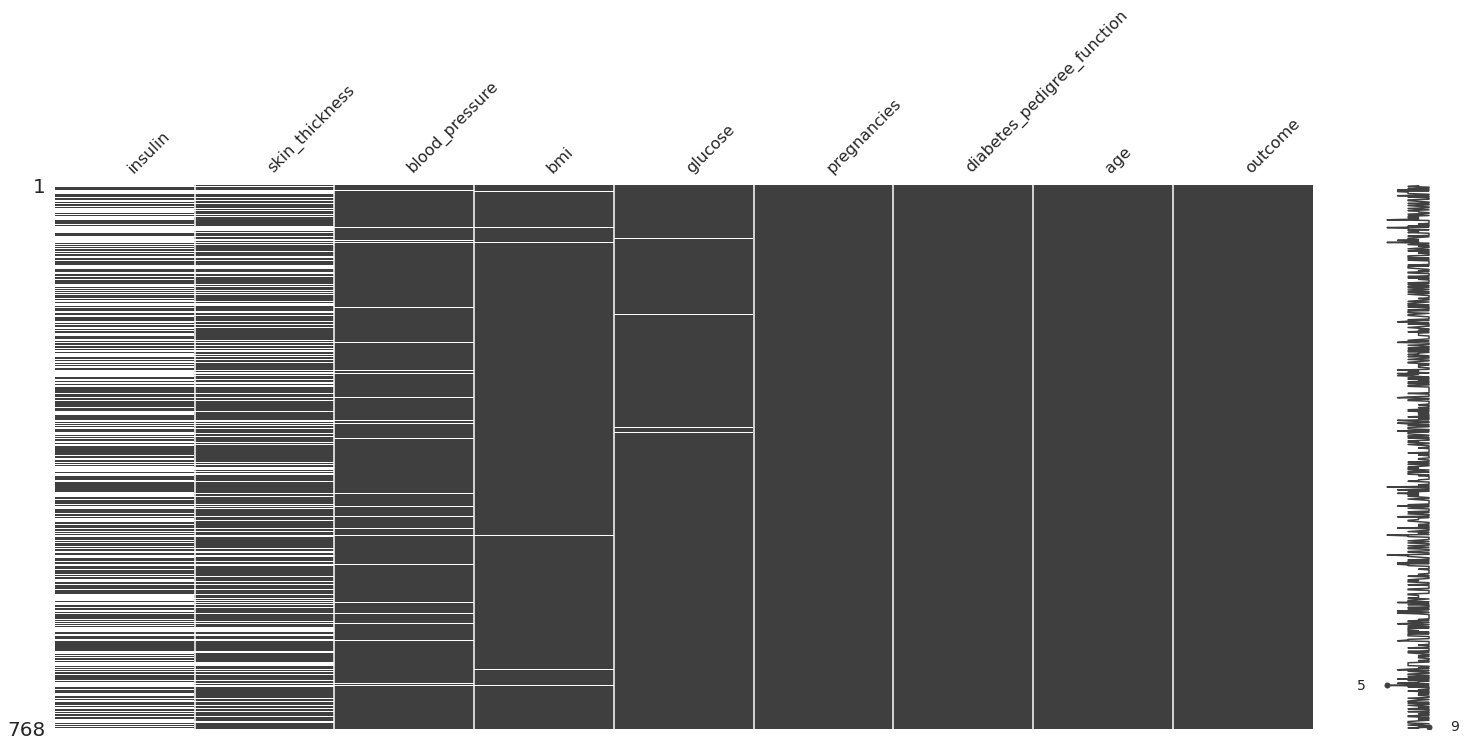

In [61]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

### _Missing At Random_ (MAR)

<AxesSubplot:>

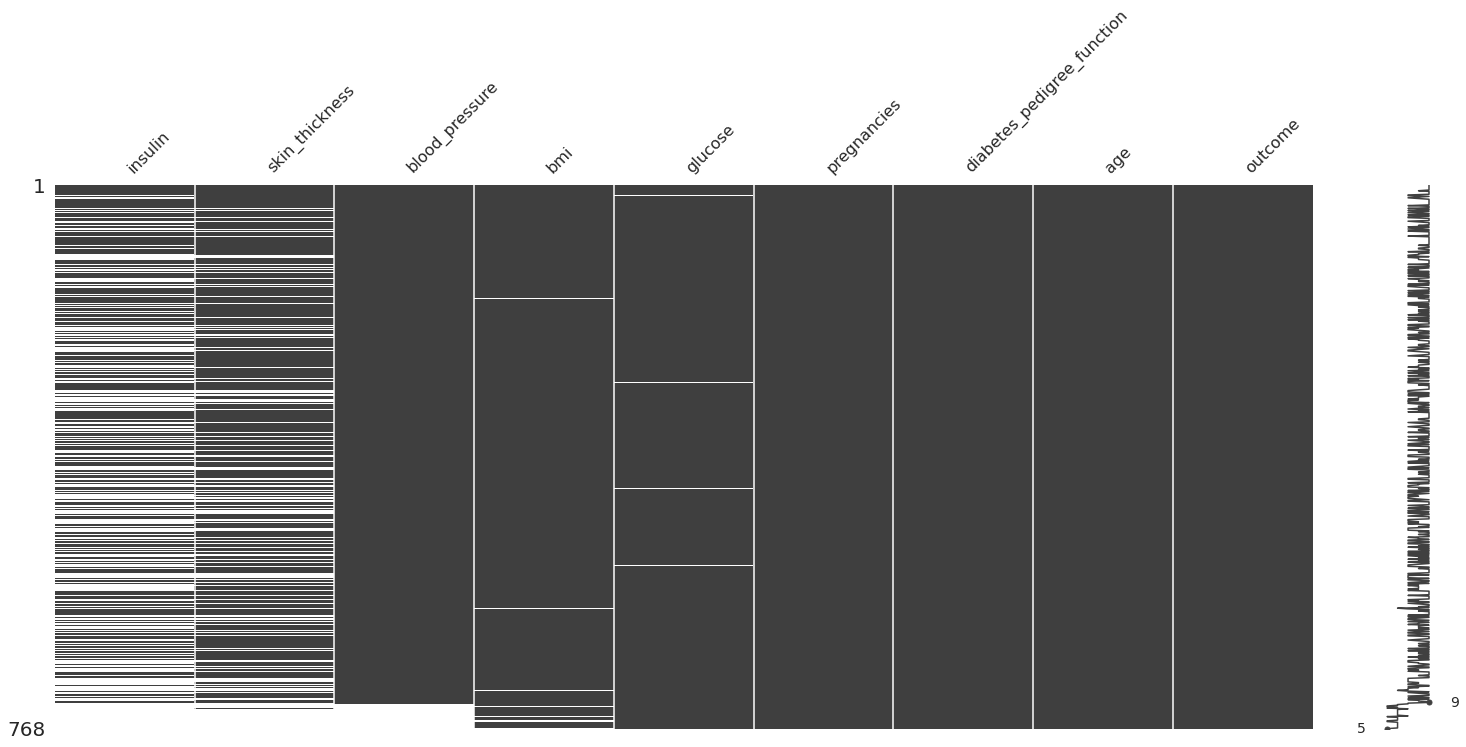

In [62]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='blood_pressure')
    .pipe(missingno.matrix)
)

### _Missing Not At Random_ (MNAR)

<AxesSubplot:>

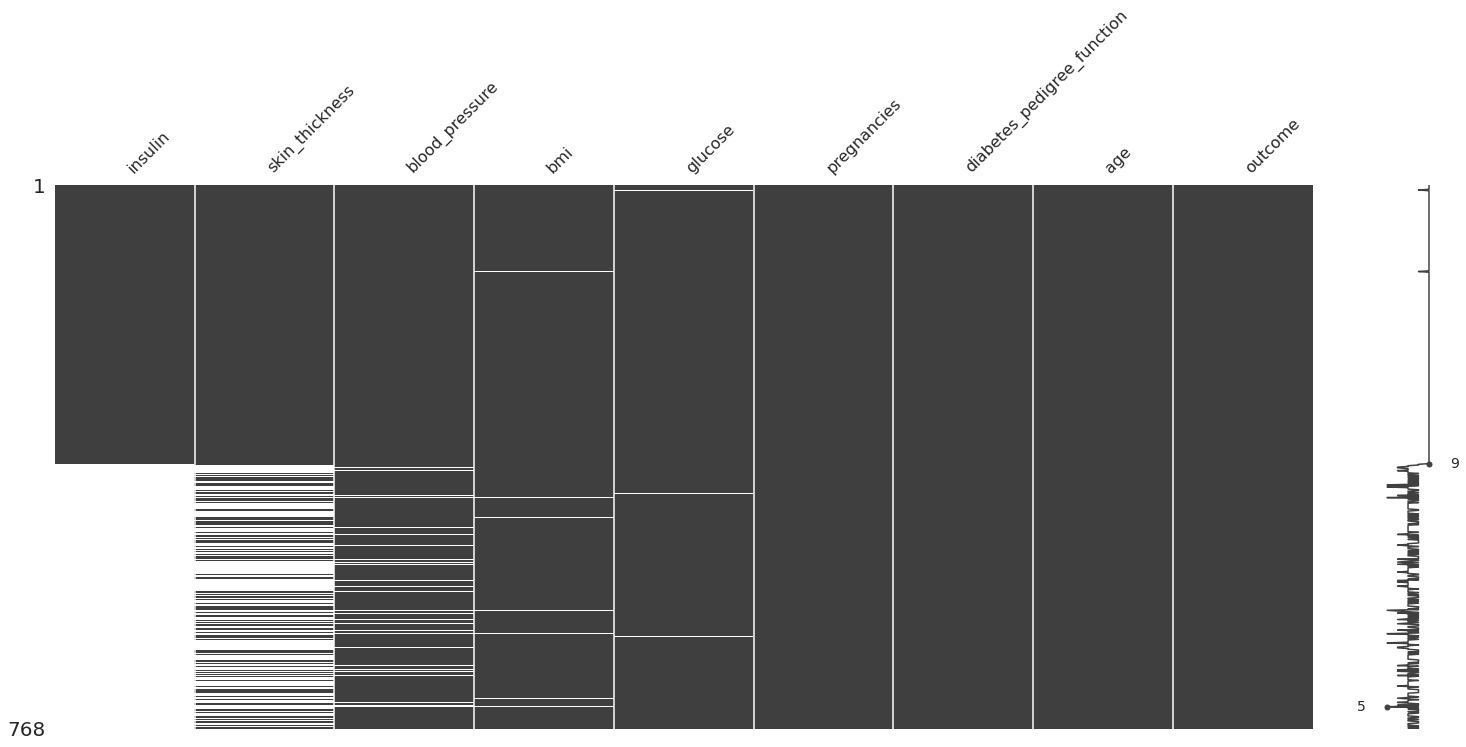

In [63]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='insulin')
    .pipe(missingno.matrix)
)


## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [64]:
(
    riskfactors_df
    .isna()
    .replace({
        False: 'Not missing',
        True : 'Missing'
    })
    .add_suffix("_NA")
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis='columns'
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


### Utilizar función de utilería `bind_shadow_matrix()`

In [65]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [66]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .groupby(['weight_lbs_NA'])
    ['age']
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


## Visualización de valores faltantes en una variable

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

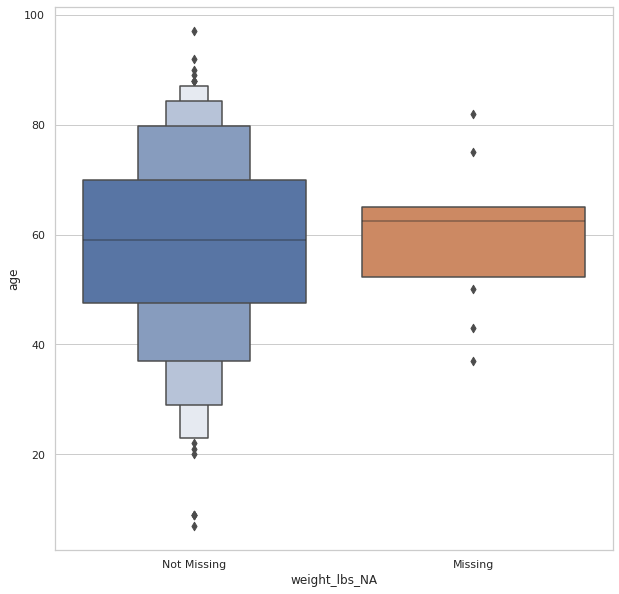

In [67]:
(
    riskfactors_df.missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x='weight_lbs_NA',
                y='age'

            )
        )
    )
)

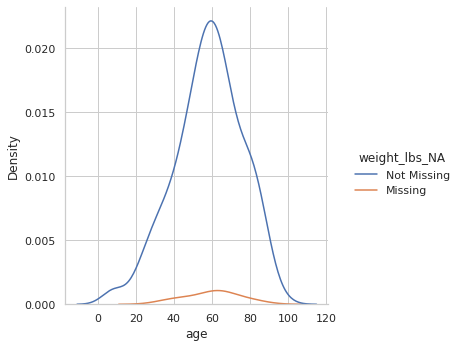

In [68]:
(
    riskfactors_df.missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                hue='weight_lbs_NA',
                kind='kde'
            )
        )
    )
)

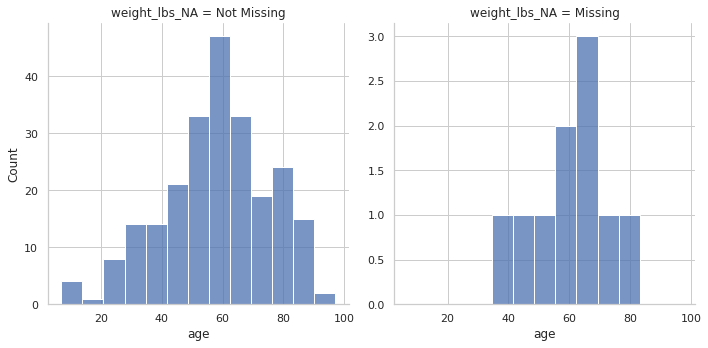

In [69]:
(
    riskfactors_df.missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col='weight_lbs_NA',
                facet_kws={
                    'sharey':False,
                }
            )
        )
    )
)

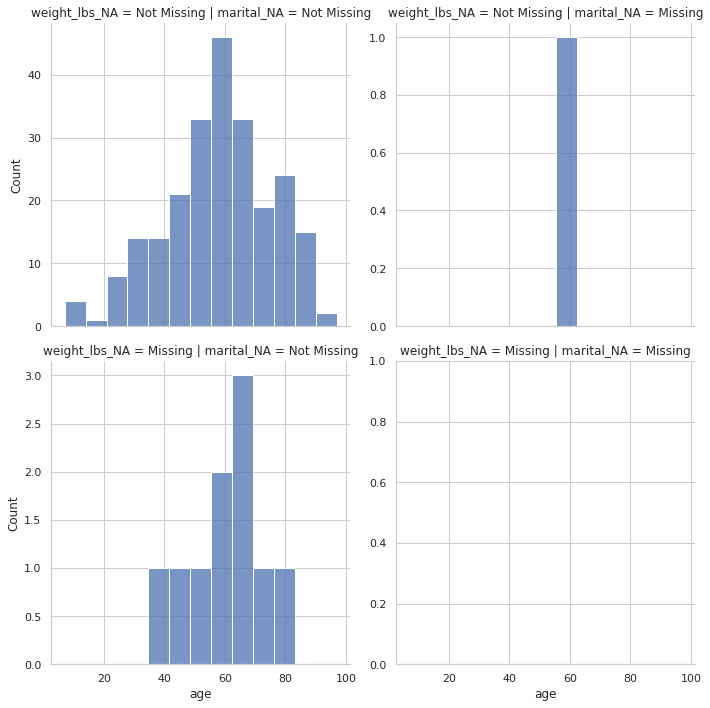

In [70]:
(
    riskfactors_df.missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                row='weight_lbs_NA',
                col='marital_NA',
                facet_kws={
                    'sharey':False,
                }
            )
        )
    )
)

## Visualización de valores faltantes en dos variables

In [71]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10,
    jitter: float=0.07,
    seed: int=42,
    ) -> pd.Series:
    
    column = column.copy(deep=True)

    # Extract values metadata
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Creathe the "jitter" (noise) to be added around the points
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter

    return column

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

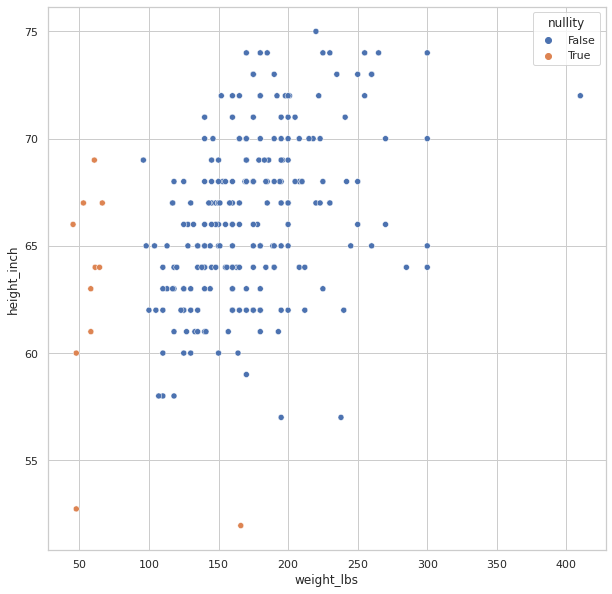

In [72]:
(
    riskfactors_df.select_dtypes(exclude='category')
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x='weight_lbs',
                y='height_inch',
                hue='nullity',
            )
        )
    )
)


## Correlación de nulidad

<AxesSubplot:>

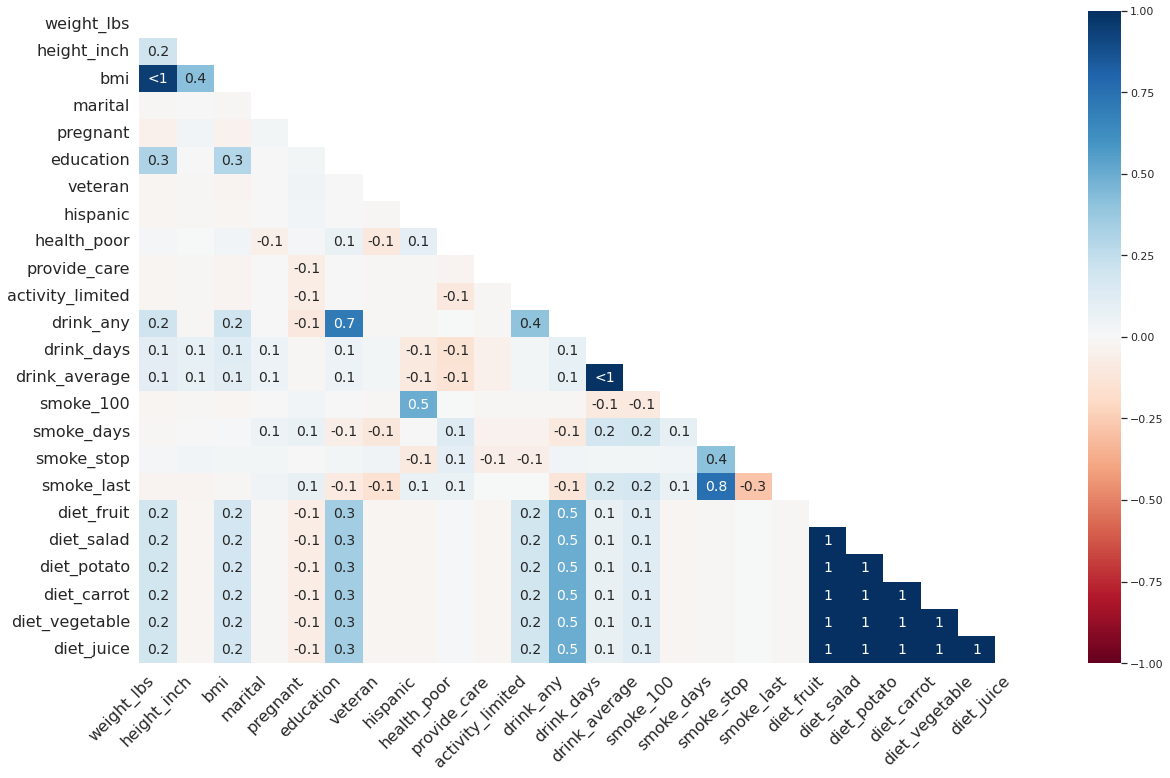

In [73]:
missingno.heatmap(
    df=riskfactors_df
)

<AxesSubplot:>

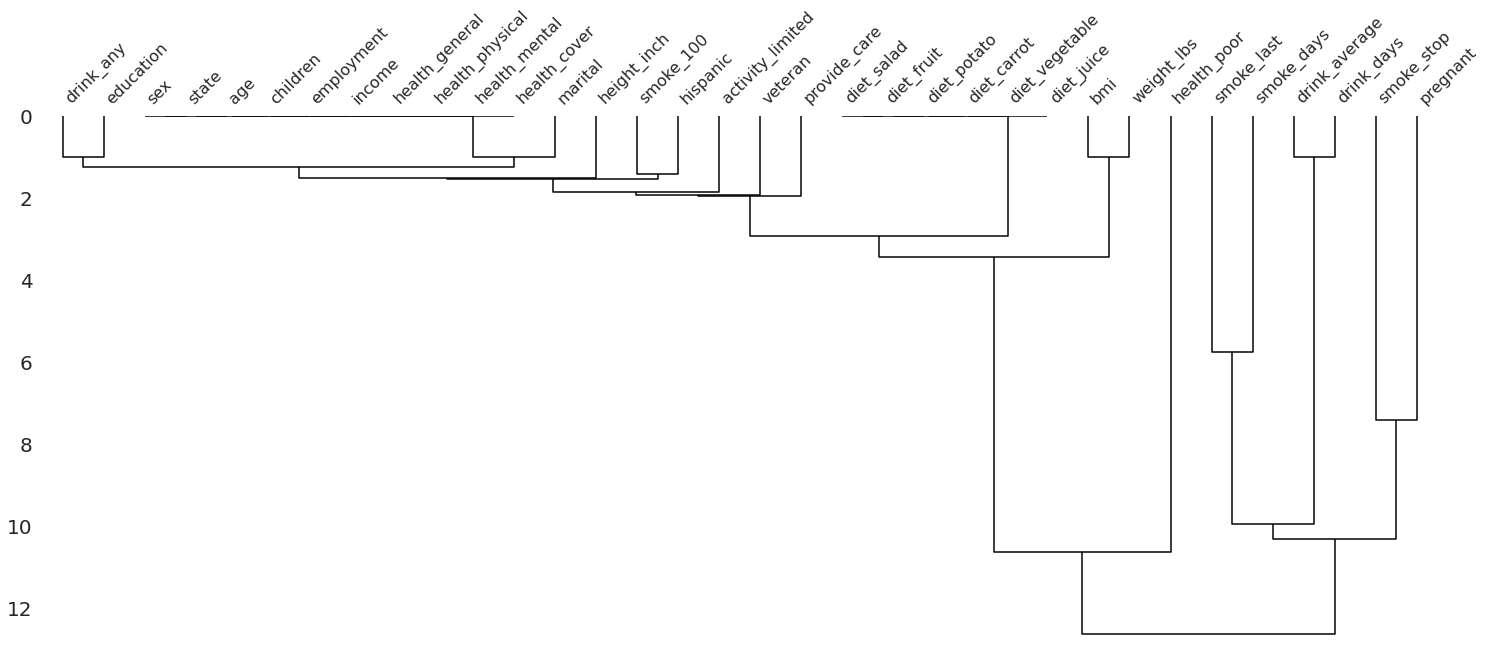

In [74]:
missingno.dendrogram(
    df=riskfactors_df
)

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

In [75]:
riskfactors_df.shape

(245, 34)

### _Pairwise deletion_ (eliminación por pares)

In [76]:
(
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

In [77]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

In [78]:
riskfactors_df.mean(skipna=False)

/tmp/ipykernel_1058/2266639386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  riskfactors_df.mean(skipna=False)


age                58.106122
weight_lbs               NaN
height_inch              NaN
bmi                      NaN
children            0.424490
health_physical     4.118367
health_mental       3.142857
health_poor              NaN
drink_days               NaN
drink_average            NaN
diet_fruit               NaN
diet_salad               NaN
diet_potato              NaN
diet_carrot              NaN
diet_vegetable           NaN
diet_juice               NaN
dtype: float64

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

In [79]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs'],
        how='any'
    )
    .shape
)

(235, 34)

#### Con base en 2 o más columnas

In [80]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='any'
    )
    .shape
)

(234, 34)

### Representación gráfica tras la eliminación de los valores faltantes

<AxesSubplot:>

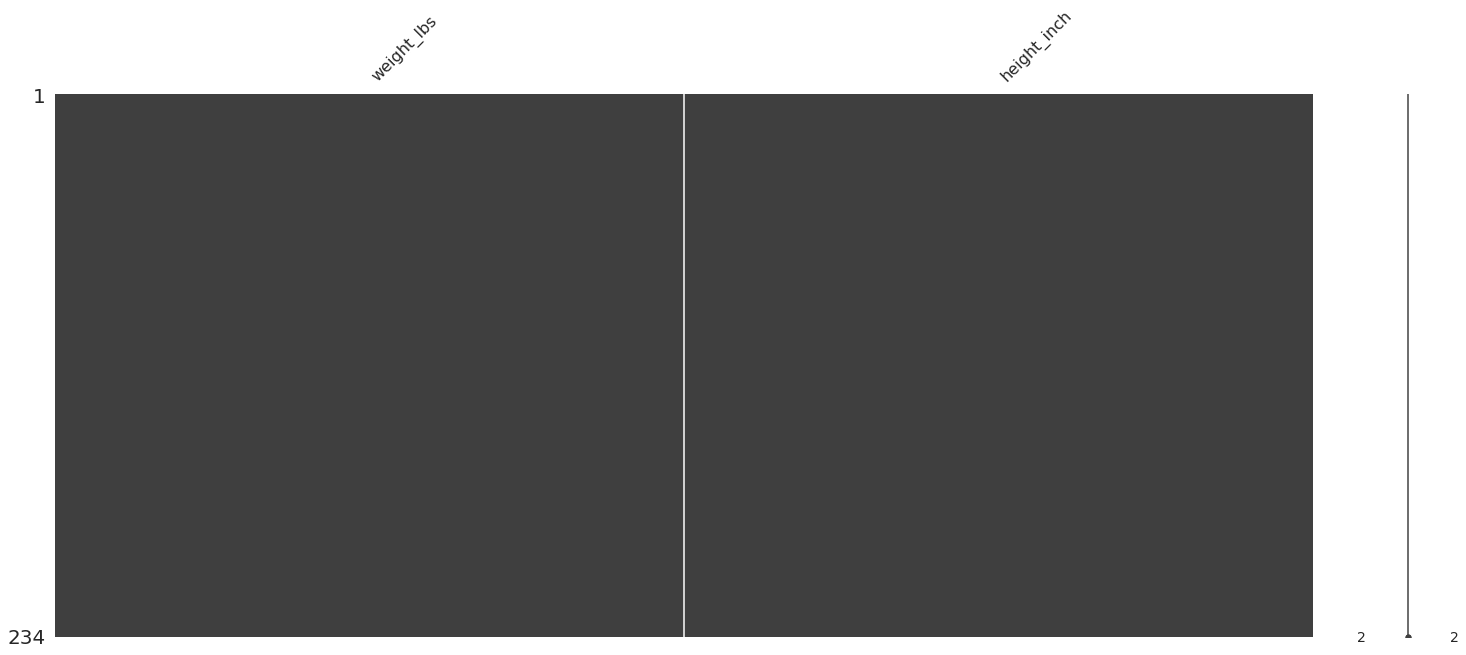

In [81]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'],
        how='any' # all or any
    )
    .select_columns(['weight_lbs', 'height_inch'])
    .pipe(missingno.matrix)
)

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [82]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [83]:
implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


### Imputación de un único valor

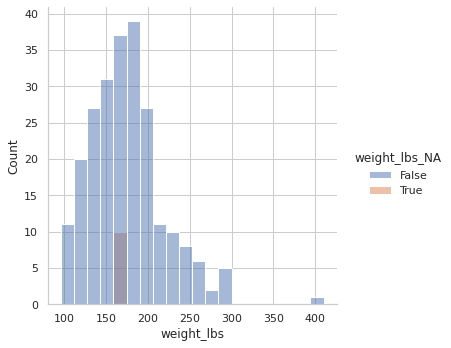

In [84]:
(
    riskfactors_df
    .select_columns('weight_lbs', 'height_inch','bmi')
    .missing.bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis = 'rows',
        func = lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='weight_lbs',
                hue='weight_lbs_NA'
            )
        )
    )
)

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

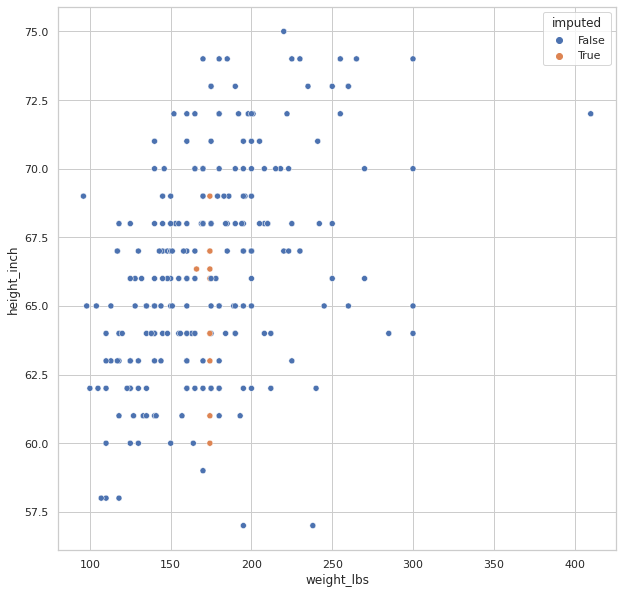

In [85]:
(
    riskfactors_df
    .select_columns('weight_lbs', 'height_inch','bmi')
    .missing.bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis = 'rows',
        func = lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x='weight_lbs',
                y='height_inch',
                hue='imputed'
            )
        )
    )
)

In [ ]:
riskfactors_df.viz.multiple_viz_inputations(['weight_lbs', 'height_inch','bmi']) 

## Continúa aprendiendo sobre el manejo de valores faltantes

Has aprendido bastante sobre la exploración y manipulación de valores faltantes.

Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.

Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 

Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.

A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.

## Información de sesión

In [86]:
2+np.nan

nan

In [87]:
session_info.show()